# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you find **at least two datasets** on the web which are related, and that you visualize these datasets to answer the assignment question. You are free to utilize datasets with any location or domain, the usage of **Ann Arbor sports and athletics** datasets in the example is just a suggestion.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * You must state a question you are seeking to answer with your visualizations.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together as an example! [Example Solution File](./readonly/Assignment4_example.pdf)

# 1 Region and Domain
### State the region and the domain category that your data sets are about:
<font color='red'>All States in the USA</font>

# 2 Research Question
### You must state a question about the domain category and region that you identified as being interesting:
<font color='red'>What factor plays the greatest role in one's happiness based on the state that they live in?</font>

# 3 Links
### You must provide at least two links to publicly accessible datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.

 - https://worldpopulationreview.com/state-rankings/happiest-states
 - https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income
 - https://wallethub.com/edu/most-fun-states/34665
 - https://worldpopulationreview.com/state-rankings/state-densities
 - https://worldpopulationreview.com/state-rankings/safest-states
 - https://worldpopulationreview.com/state-rankings/public-school-rankings-by-state
 - https://taxfoundation.org/publications/state-local-tax-burden-rankings/


# 4 Image
### You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo’s principles of truthfulness, functionality, beauty, and insightfulness.

![happiness_data.jpg](attachment:7b307dc8-0667-43bd-b794-6e80a89a8b1f.jpg)


# 5 Discussion
### You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

This visualization showed the correlation between different common determining factors when choosing which U.S. State to live in and the overall happiness score of that state. The goal of this visualization was to show which factors actually do make a meaningful impact in one's happiness where they live and which don't. Multiple different datasets were pulled and joined together based on the values for each state. The data needed to be filtered to give only the columns relevant for the data and exclude rows accounting for averages for the entire U.S. the District of Columbia, and any U.S. territories. The income CSV had a few extra specifications in its State naming convention, so those cells had to be renamed in order for the joining to work properly. The figure made up of 8 subplots showing the line of best fit and correlations of each determining factor column based on the total happiness score. All of the data had to be normalized based on the max value of each factor column so that the correlation and slope would not be largely skewed based on values being very large (Home value) or very small (Effective Tax). The figure indicates that the main factor of a state that determine one's happiness is the median income. Median income vs Happiness Score ultimately scored the highest amongst all other factors in both correlation (0.77) and slope (0.73). This means that median income is the most highly correlated with Happiness and the higher a state's median income, the more drastically higher the happiness score is.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
folder = "/content/drive/MyDrive/[3] Colab Notebooks/*Python Data Science/Course 2/Week 4/U.S. State Happiness Assignment"
happiness = pd.read_csv(f'{folder}/US_States_by_Happiness.csv')
house_prices = pd.read_csv(f'{folder}/US_State_House_Prices.csv')
income = pd.read_csv(f'{folder}/US_State_Median_Income.csv')

fun = pd.read_csv(f'{folder}/US_States_by_Fun.csv')
population = pd.read_csv(f'{folder}/US_States_by_Population.csv')
safety = pd.read_csv(f'{folder}/US_States_by_Safety.csv')
schools = pd.read_csv(f'{folder}/US_States_by_Schools.csv')
taxes = pd.read_csv(f'{folder}/US_States_by_Taxes.csv')



In [7]:
#happiness = pd.read_csv('US_States_by_Happiness.csv')
#house_prices = pd.read_csv('US_State_House_Prices.csv')
#income = pd.read_csv('US_State_Median_Income.csv')

#fun = pd.read_csv('US_States_by_Fun.csv')
#population = pd.read_csv('US_States_by_Population.csv')
#safety = pd.read_csv('US_States_by_Safety.csv')
#schools = pd.read_csv('US_States_by_Schools.csv')
#taxes = pd.read_csv('US_States_by_Taxes.csv')



In [8]:
happiness = happiness.iloc[:,:2]#happiness.loc['State','Total Happiness Score']]
house_prices = house_prices.iloc[:,:].rename(columns={"Typical home value, March 2023":"Median Home Value ($)"})
income =  pd.concat([income.iloc[2:,1:3], income.iloc[2:,-1]], axis=1).rename(columns={"2021":"Median Income ($)","Average annual growth rate (current dollars) in 2010-2021, %":"Median Income Growth (%)"})

fun = fun.iloc[:,1:3].rename(columns={"Total Score\xa0":"Fun Score"})
population = population.iloc[:,:2].rename(columns={"Density (/mi²)":"Pop Density (/mi²)"})
safety = safety.iloc[:,[0,2]].rename(columns={"Total Safety Score":"Safety Score"})
schools = schools.iloc[:,:2].rename(columns={"Overall Score":"School Score"})
taxes = taxes.iloc[:,:2].rename(columns={"Effective Tax Rate":"Effective Tax Rate (%)"})

#income
###############NEXT STEPS:
################## get links

In [9]:
income.rename(columns={"States and Washington, D.C.": "State"}, inplace=True)
#income["State"]=income["State"].str.strip()
income = income.applymap(lambda x: x.strip() if isinstance(x, str) else x)#STRIPS ALL WHITE SPACE FROM ENTIRE DF

income=income.set_index("State")
#print(income)
income.rename(index={"Washington (state) Washington": "Washington",
                     "New York (state) New York": "New York",
                     "Georgia (U.S. state) Georgia": "Georgia"},
                      inplace=True)

income = income.reset_index()


In [10]:
df = happiness.merge(house_prices, how='outer', on='State')
df=df.merge(income, how='outer', on='State')
df=df.merge(fun, how='outer', on='State')
df=df.merge(population, how='outer', on='State')
df=df.merge(safety, how='outer', on='State')
df=df.merge(schools, how='outer', on='State')
df=df.merge(taxes, how='outer', on='State')


df=df[df['State']!='District of Columbia']
df=df.sort_values(by="State").reset_index(drop=True).set_index('State')
df = df.replace(r'[^0-9.-]', '', regex=True).astype(float)

df

,Total Happiness Score,Median Home Value ($),Median Income ($),Median Income Growth (%),Fun Score,Pop Density (/mi²),Safety Score,School Score,Effective Tax Rate (%)
State,,,,,,,,,
Alabama,39.32,206044.0,53913.0,2.65,34.0,101.0,37.68,37.02,9.8
Alaska,46.27,345363.0,77845.0,1.75,39.0,1.0,54.52,36.43,4.6
Arizona,50.22,409038.0,69056.0,3.62,43.0,66.0,52.95,35.13,9.5
Arkansas,38.23,178744.0,52528.0,2.92,23.0,59.0,33.72,43.84,10.2
California,59.97,728134.0,84907.0,3.59,65.0,250.0,48.94,42.42,13.5
Colorado,50.70,539640.0,82254.0,3.90,52.0,57.0,43.84,53.70,9.7
Connecticut,58.15,358906.0,83771.0,2.48,25.0,749.0,59.88,67.50,15.4
Delaware,55.16,358686.0,71091.0,2.25,21.0,529.0,51.36,58.07,12.4
Florida,55.08,383063.0,63062.0,3.25,62.0,423.0,39.52,55.22,9.1


In [11]:
##NORMALIZE ALL DATA

for column in df.columns:
    max=df[column].max()
    print(f'{column} Max: {max}')
    df[column]=df[column]/max
#df.sort_values(by="Total Happiness Score")

Total Happiness Score Max: 66.31
Median Home Value ($) Max: 834583.0
Median Income ($) Max: 90203.0
Median Income Growth (%) Max: 4.0
Fun Score Max: 65.0
Pop Density (/mi²) Max: 1259.0
Safety Score Max: 68.79
School Score Max: 73.14
Effective Tax Rate (%) Max: 15.9


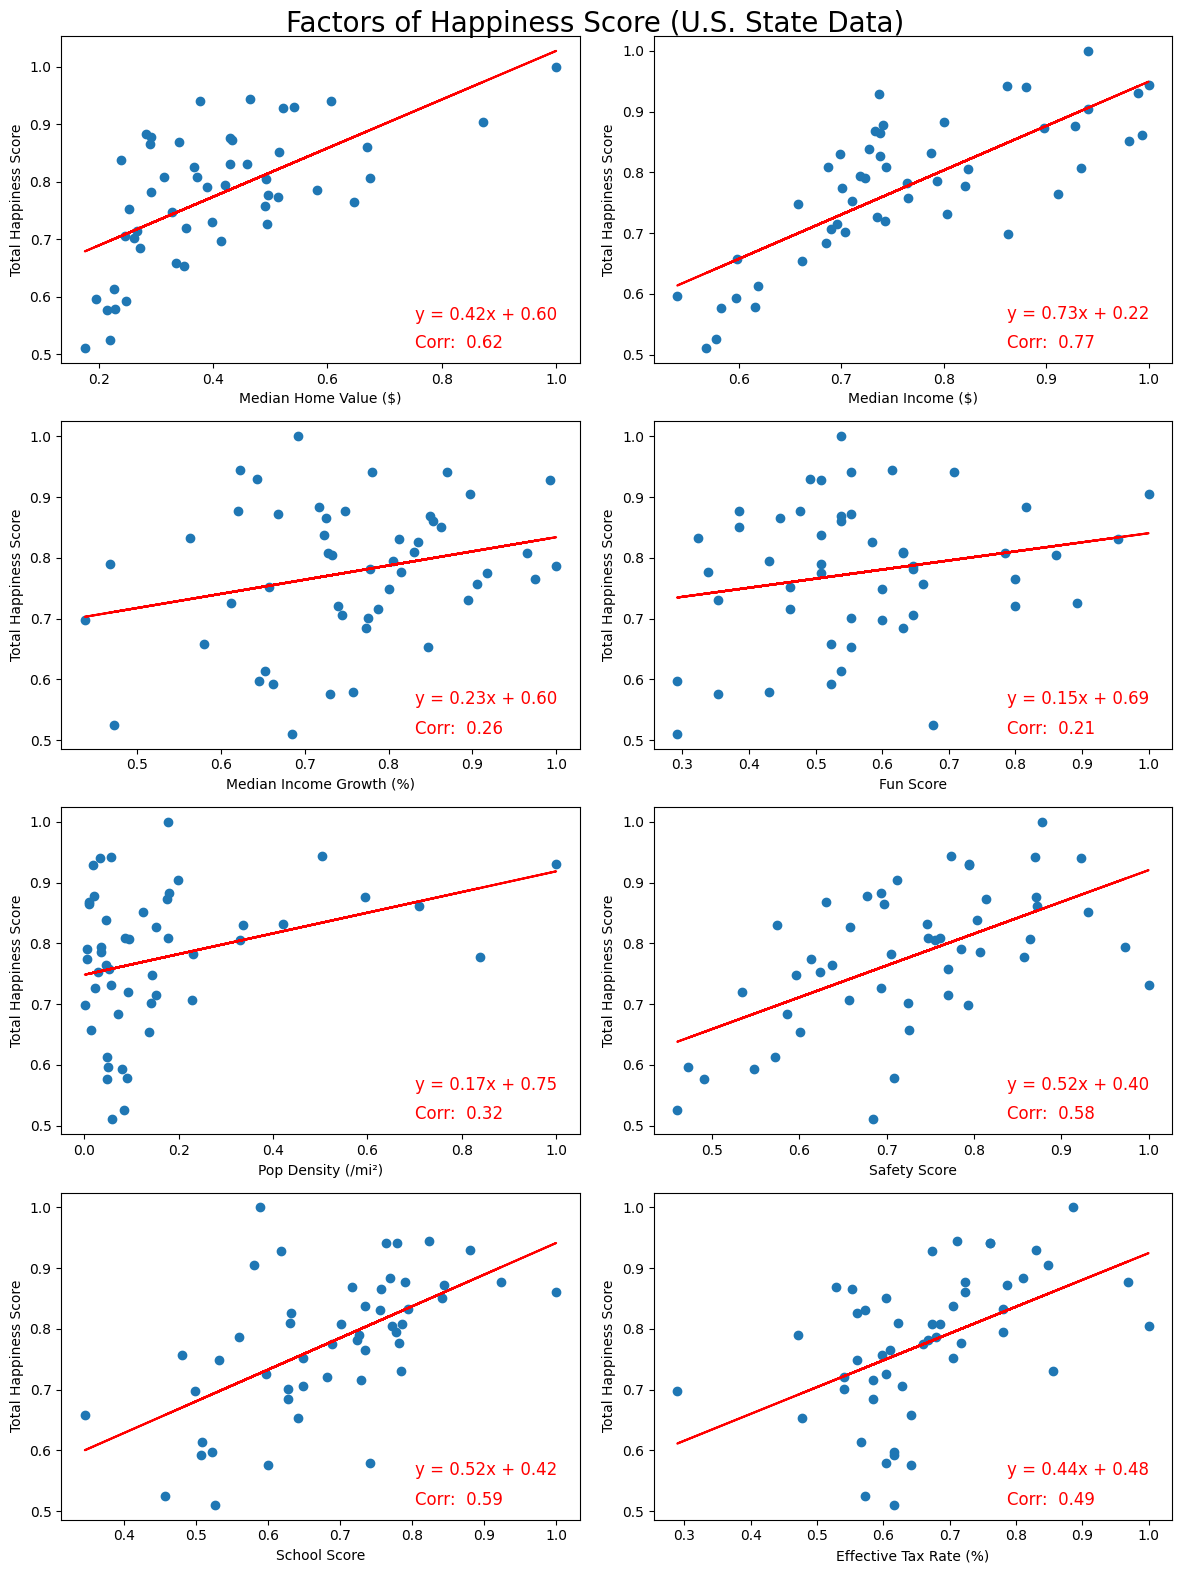

In [12]:
y = df.columns[0]
df = df.apply(pd.to_numeric, errors='coerce')
fig, axs = plt.subplots(4, 2, figsize=(12, 16))
axs = axs.flatten()


for i, x in enumerate(df.columns[1:]):
    a, b = np.polyfit(df[x], df[y], 1)
    correlation_score = df[x].corr(df[y])
    text_x = df[x].min() + (df[x].max() - df[x].min()) * 0.7
    text_y1 = df[y].min() + (df[y].max() - df[y].min()) * 0.1
    text_y2 = df[y].min() + (df[y].max() - df[y].min()) * 0

    axs[i].scatter(df[x], df[y])
    axs[i].plot(df[x], a*df[x]+b,c='red', label='Line of Best Fit')
    equation = f'y = {a:.2f}x + {b:.2f}'
    corr_text=f'Corr:  {correlation_score:.2f}'

    axs[i].text(text_x, text_y1, equation, fontsize=12, color='red')
    axs[i].text(text_x, text_y2, corr_text, fontsize=12, color='red')

    axs[i].set_xlabel(x)
    axs[i].set_ylabel(y)
    #axs[i].set_title(f'{x} vs {y}')
fig.suptitle("Factors of Happiness Score (U.S. State Data)", fontsize=20)
fig.tight_layout()
fig.show()
#fig.savefig('happiness_data.jpg')